Hello User!
Guide: 1 is for 8-Queens Problem and 2 is for Travelling Salesman Problem
Enter your choice: 1

Improved Version of 8-Queens Problem
Running...
Best fitness value= 29
Final best state= [6, 0, 2, 7, 5, 3, 1, 4]
Generation found= 133



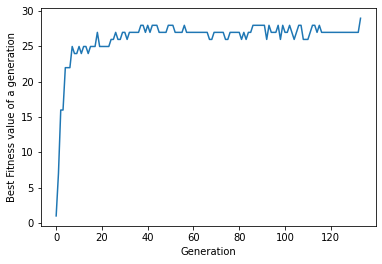

In [ ]:
import pandas as pd
import numpy as np
import math
import random
from random import randint
import matplotlib
import matplotlib.pyplot as plt


class Queen:

  def __init__(self):
    print("Improved Version of 8-Queens Problem")
    print("Running...")
    self.pop2 = self.Initial_pop(40)
    self.generation_new,self.y_values_new = self.Genetic_Algo_imp(self.pop2,self.Fitness)
    plt.plot(self.generation_new,self.y_values_new, label='Improved')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness value of a generation')
    plt.show()
    print()


  #initial population
  def Initial_pop(self, size):
    population=[]
    fixed_row = 3
    for i in range(size):  
      state= []
      for j in range(8):
        state.append(fixed_row)   
      population.append(state)

    return population


  #reproduce improvement
  def Reproduce_imp(self, x, y):
    n = len(x)
    child = [None]*n
    fitness_x = self.Fitness(x)
    fitness_y = self.Fitness(y)
    prob_x = fitness_x/(fitness_x+fitness_y)
    prob_y = fitness_y/(fitness_x+fitness_y)

    for i in range(n):
      if (x[i]==y[i]):
        child[i] = x[i]
      else:
        toss = random.uniform(0, 1)
        if (toss<=prob_x):
          child[i] = x[i]
        else:
          child[i] = y[i]
    return child


  #return number of clashing pairs
  def Clashing(self, state):
    n = len(state)
    answer = 0
    row_freq = [0] * n
    md_freq = [0] * (2 * n)
    sd_freq = [0] * (2 * n)

    #for same rows, main diag and secondary diag
    for i in range(n):
      value = state[i]
      row_freq[value] += 1
      md_freq[value + i] += 1
      sd_freq[n - value + i] += 1

    for i in range(n):
      n_queen = row_freq[i]
      answer += (n_queen*(n_queen-1)/2)

    for i in range(2*n):
      answer += (md_freq[i] * (md_freq[i]-1)/2)
      answer += (sd_freq[i]* (sd_freq[i]-1)/2)    
    return int(answer)


  #function that measures the fitness of an individual state
  #state is a list of 8 
  def Fitness(self, state):
    fit_val = (28 - self.Clashing(state)) + 1
    return fit_val


  #fuction to return best fitness out of all the states
  def Best_Fitness(self, population, Fitness):
    n = len(population)
    best_val = 0
    best_state = []
    for i in range(n):
      value = self.Fitness(population[i])
      if (value > best_val):
        best_val = value
        best_state = population[i]

    return (best_val,best_state)


  #random selection of parents based on fitness
  def Random_sel(self, population, Fitness):
    n = len(population)
    pop_fitness_frac = [0] * n    #fitness of population
    total_fitness = 0

    for i in range(n):
      state = population[i]
      pop_fitness_frac[i] = self.Fitness(state)
      total_fitness += pop_fitness_frac[i]
      
    for i in range(n):  
      pop_fitness_frac[i] /= total_fitness

    sample_size = 2
    choice_indices = np.random.choice(len(pop_fitness_frac), size=sample_size, replace=True, p=pop_fitness_frac)
    return choice_indices

  #mutate
  def Mutate(self, state):
    pos = random.randint(0,7)   #both included
    new_val = random.randint(0,7)
    state[pos]=new_val
    return state


  def Genetic_Algo_imp(self, population, Fitness):
    generation = []
    y_values = []
    generation.append(0)
    y_values.append(1)
    time=0
    best_fitness_val=1
    while (best_fitness_val != 29):
      time += 1
      new_population=[]
      for i in range(40):
        choice_indices = self.Random_sel(population, Fitness)
        x = population[choice_indices[0]]
        y = population[ choice_indices[1]]
        child = self.Reproduce_imp(x,y)    #improved version
        #mutation
        mutate_num = random.uniform(0, 1)
        if(mutate_num<0.2):
          child = self.Mutate(child)
        new_population.append(child)
            
      population=new_population
      best_fitness_val= self.Best_Fitness(population, Fitness)[0]
      generation.append(time)
      y_values.append(best_fitness_val)
      if(time>1000):
        break

    best_val, best_state= self.Best_Fitness(population, Fitness)
    print('Best fitness value=', best_val)
    print('Final best state=', best_state)
    print('Generation found=', time)
    print()
    return (generation,y_values)

###############################################################################

class Salesman:

  def __init__(self):

    print("Improved Version of TSP")
    print("Running...")
    self.dict2=({"A":[0, 1000, 1000, 1000, 1000, 1000, 0.15, 1000, 1000, 0.2, 1000, 0.12, 1000, 1000],
                  "B":[ 1000, 0, 1000, 1000, 1000, 1000, 1000, 0.19, 0.4,  1000, 1000, 1000, 1000, 0.13],
                  "C":[ 1000, 1000, 0, 0.6, 0.22, 0.4,  1000, 1000, 0.2,  1000, 1000, 1000, 1000, 1000],
                  "D":[ 1000, 1000, 0.6, 0, 1000, 0.21, 1000, 1000, 1000, 1000, 0.3, 1000, 1000, 1000],
                  "E":[ 1000, 1000, 0.22, 1000, 0, 1000, 1000, 1000, 0.18, 1000, 1000, 1000, 1000, 1000],
                  "F":[ 1000, 1000, 0.4, 0.21, 1000, 0, 1000, 1000, 1000, 1000, 0.37, 0.6, 0.26, 0.9],
                  "G":[ 0.15, 1000, 1000, 1000, 1000, 1000, 0, 1000, 1000, 1000, 0.55, 0.18, 1000, 1000],
                  "H":[ 1000, 0.19, 1000, 1000, 1000, 1000, 1000, 0, 1000, 0.56, 1000, 1000, 1000, 0.17],
                  "I":[ 1000,0.4, 0.2, 1000, 0.18, 1000, 1000, 1000, 0, 1000, 1000, 1000, 1000, 0.6],
                  "J":[ 0.2, 1000, 1000, 1000, 1000, 1000, 1000, 0.56, 1000, 0, 1000, 0.16, 1000, 0.5],
                  "K":[ 1000, 1000, 1000, 0.3, 1000, 0.37, 0.55, 1000, 1000, 1000, 0, 1000, 0.24, 1000],
                  "L":[ 0.12, 1000, 1000, 1000, 1000, 0.6, 0.18, 1000, 1000, 0.16, 1000, 0, 0.4, 1000],
                  "M":[  1000, 1000, 1000, 1000, 1000, 0.26, 1000, 1000, 1000, 1000, 0.24, 0.4, 0, 1000],
                  "N":[ 1000, 0.13, 1000, 1000, 1000, 0.9, 1000, 0.17, 0.6, 0.5, 1000, 1000, 1000, 0],
                  "cities": ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']})
    
    self.df = pd.DataFrame(self.dict2)
    self.df = self.df.set_index('cities')
    self.pop2 = self.Initial_pop(30)
    self.gen2, self.y2 = self.Genetic_Algo_imp(self.pop2)
    plt.plot(self.gen2,self.y2, label='New')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness value of a generation')
    plt.show()
    print()


  #initial population
  def Initial_pop(self, size):
    state = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
    population = []
    for i in range(size):
      population.append(state)  
    return population


  #calculating total distance for a state
  def Distance(self, state):
    total_dist = 0
    for i in range(13):
      start = state[i]
      end = state[i+1]
      total_dist += self.df.loc[start][end]
      
    total_dist += self.df.loc[state[13]][state[0]]
    return total_dist


  #fitness value of a state
  def Fitness(self,state):
    fitness = (1/self.Distance(state)) + 1
    return fitness


  #fitness of entire population
  def Pop_Fitness(self,population):
    fitness = [ ((1/self.Distance(i))+1) for i in population]
    return fitness
  

  #Best fitness from the popluation
  def Best_Fitness(self,pop_fitness):
    best_val = np.max(pop_fitness)
    best_state_index = pop_fitness.index(best_val)
    return (best_val,best_state_index)


  #reproduce from two parents
  def Reproduce(self, x, y):
    child = [None]* len(x)
    left = randint(0, len(x)-1)
    right = randint(left+1, len(x))
    child[left:right] = x[left:right]     #taking the sublist from parent x

    for i in range(len(y)):
      if (y[i] in child) :
        continue
      else :
        pos = child.index(None)
        child[pos] = y[i]   
    return child


  #selecting 2 parents randomly with probability based on fitness
  def Random_sel(self, pop_fitness):
    small = np.min(pop_fitness)
    big = np.max(pop_fitness)
    prob = None

    if (small!=big):
      prob = [(i-small)/(big-small) for i in pop_fitness]
      prob = [ (i/(np.sum(prob))) for i in prob]
    else :
      prob = [i/np.sum(pop_fitness) for i in pop_fitness]

    sample_size = 2
    choice_indices = np.random.choice(len(prob), size=sample_size, replace=True, p=prob)
    return choice_indices


  #finding nearest neighbour
  def Nearest(self, city):
    min_dist = 1000
    cities = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
    ans = None    #the nearest neighbour
    for i in range(len(cities)):
      if (city != cities[i]):
        if (self.df.loc[city][cities[i]] < min_dist):
          min_dist = self.df.loc[city][cities[i]]
          ans = cities[i] 
    return ans


  #randomly finding neighbour of a city who is not at infinity
  def Neighbour(self, city):
    cities = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
    neighbours = []
    for i in range(len(cities)):
      if (city!=cities[i] and self.df.loc[city][cities[i]]!=1000):
        neighbours.append(cities[i])
    
    pick = randint(0,len(neighbours)-1)
    return neighbours[pick]


  #improved version of mutate version
  def Mutate_imp(self, state):
    left = randint(0, len(state)-1)
    right = randint(left+1, len(state))

    #step 1: inversion
    temp = state[left:right]
    temp.reverse()
    state[left:right]=temp

    #step 2: pick a random city and find its nearest neighbour, then pick the neighbours' neighbour and swap them
    index = randint(0, len(state)-1)
    city = state[index]     #random city name
    nearest = self.Nearest(city)     #nearest city name to city
    neighbour = self.Neighbour(nearest)
    neighbour_index = state.index(neighbour)
    #swap
    swap_val = state[index]
    state[index] = state[neighbour_index]
    state[neighbour_index] = swap_val
    return state


  #genetic algorithm
  def Genetic_Algo_imp(self, population):
    overall_gen = -1
    overall_best_fitness = -1
    overall_best_state = []
    generation = []
    y_values = []

    pop_fitness = self.Pop_Fitness(population)         #population fitness
    best_fitness_val, best_state_index = self.Best_Fitness(pop_fitness)
    best_state = population[best_state_index]

    time=0
    generation.append(time)
    y_values.append(best_fitness_val)

    while (time<750):
      time += 1
      new_population=[]
      for i in range(30):
        choice_indices = self.Random_sel(pop_fitness)
        x = population[choice_indices[0]]
        y = population[ choice_indices[1]]
        child = self.Reproduce(x,y)
        #mutation
        mutate_num = random.uniform(0, 1)
        if(mutate_num<0.2):
          child = self.Mutate_imp(child)
        new_population.append(child)
            
      population = new_population
      pop_fitness = self.Pop_Fitness(population)
      best_fitness_val, best_state_index = self.Best_Fitness(pop_fitness)
      generation.append(time)
      y_values.append(best_fitness_val)

      if (best_fitness_val>overall_best_fitness):
        overall_best_fitness = best_fitness_val
        overall_best_state = population[best_state_index]
        overall_gen = time
      
    print('Best fitness value=', overall_best_fitness)
    print("Optimal distance found=", 1/(overall_best_fitness-1))
    print('Final best state=', overall_best_state)
    print('generation found=', overall_gen)
    return (generation,y_values)


###############################################################################

print("Hello User!")
print("Guide: 1 is for 8-Queens Problem and 2 is for Travelling Salesman Problem")
option = input("Enter your choice: ")
print()

if (option == '1'):
    queen = Queen()
elif (option == '2'):
    salesman = Salesman()
else :
    print("Invalid choice!!\n")
    
